In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, BatchNormalization

In [ ]:
# Load data from csv file
data = pd.read_csv('/content/CII-VNINDEX-History.csv')
data_vn = data.copy()
data_vn.head()

,Unnamed: 0,Open,High,Low,Close,Volume,TradingDate
0,0,10850.0,10563.0,10563.0,10563.0,275600,2006-05-18
1,1,10308.0,10032.0,10032.0,10032.0,443520,2006-05-19
2,2,9809.0,9548.0,9548.0,9548.0,64200,2006-05-22
3,3,9331.0,9079.0,9079.0,9079.0,12760,2006-05-23
4,4,8876.0,8641.0,8641.0,8641.0,46460,2006-05-24


In [ ]:
data_vn = data_vn.copy()
data_vn.drop(columns=['Unnamed: 0'], inplace=True)
data_vn.head()

,Open,High,Low,Close,Volume,TradingDate
0,10850.0,10563.0,10563.0,10563.0,275600,2006-05-18
1,10308.0,10032.0,10032.0,10032.0,443520,2006-05-19
2,9809.0,9548.0,9548.0,9548.0,64200,2006-05-22
3,9331.0,9079.0,9079.0,9079.0,12760,2006-05-23
4,8876.0,8641.0,8641.0,8641.0,46460,2006-05-24


In [ ]:
data_vn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4186 entries, 0 to 4185
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Open         4186 non-null   float64
 1   High         4186 non-null   float64
 2   Low          4186 non-null   float64
 3   Close        4186 non-null   float64
 4   Volume       4186 non-null   int64  
 5   TradingDate  4186 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 196.3+ KB


# prepare data for train

In [ ]:
num_features = 1

In [ ]:
### Split the dataset into time windows to get data samples.

df=data_vn.copy()
X_data = []
y_data = []
window_size=30 # Time window for data feature (size of 'number of days').
k_days_ahead = 7
label_colID = -3
# Only get the open price (index 2 in the data frame)
for i in range(0, len(df) - window_size - k_days_ahead):
    data_feature = []
    data_label = []

    # Get a window_size time frame for data feature
    for j in range(window_size):
        data_feature.append(df.iloc[i + j, label_colID])

    # Next value is the label (price of the next day) to be predicted
    data_label.append(df.iloc[(i+window_size):(i+window_size+k_days_ahead), label_colID])

    # Append new data sample (feature and label) to X_data and y_data
    X_data.append(np.array(data_feature).reshape(window_size, num_features))
    y_data.append(np.array(data_label).reshape(k_days_ahead, ))


In [ ]:
data_vn.head(32)

,Open,High,Low,Close,Volume,TradingDate
0,10850.0,10563.0,10563.0,10563.0,275600,2006-05-18
1,10308.0,10032.0,10032.0,10032.0,443520,2006-05-19
2,9809.0,9548.0,9548.0,9548.0,64200,2006-05-22
3,9331.0,9079.0,9079.0,9079.0,12760,2006-05-23
4,8876.0,8641.0,8641.0,8641.0,46460,2006-05-24
5,8442.0,8218.0,8218.0,8218.0,156690,2006-05-25
6,8029.0,7818.0,7818.0,7818.0,40310,2006-05-26
7,7639.0,7434.0,7434.0,7434.0,65110,2006-05-29
8,7270.0,7073.0,7073.0,7073.0,19540,2006-05-30
9,6922.0,6734.0,6734.0,6734.0,31850,2006-05-31


In [ ]:
X_data[0]

array([[10563.],
       [10032.],
       [ 9548.],
       [ 9079.],
       [ 8641.],
       [ 8218.],
       [ 7818.],
       [ 7434.],
       [ 7073.],
       [ 6734.],
       [ 7057.],
       [ 7395.],
       [ 7749.],
       [ 8026.],
       [ 7626.],
       [ 7903.],
       [ 7941.],
       [ 7795.],
       [ 7795.],
       [ 7649.],
       [ 7649.],
       [ 7603.],
       [ 7565.],
       [ 7203.],
       [ 7073.],
       [ 7411.],
       [ 7395.],
       [ 7034.],
       [ 6973.],
       [ 6973.]])

In [ ]:
y_data[0]

array([6973., 7242., 7142., 7142., 7119., 7157., 7395.])

# Model

## lstm

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Bidirectional, Dropout, BatchNormalization

def create_lstm(input_shape):

    # Define the model with increased complexity
    model_lstm = Sequential([
        # First LSTM layer with more units
        LSTM(64, input_shape=input_shape, return_sequences=True),
        LSTM(128),
        Dropout(0.1),
        # Dense layer with more units and ReLU activation
        Dense(100, activation='relu'),
        Dense(7)
    ])
    return model_lstm

## gru

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense,Bidirectional, Dropout, BatchNormalization

def create_gru(input_shape):

    # Define the model with increased complexity
    model_gru = Sequential([
        # First LSTM layer with more units
        GRU(32, input_shape=input_shape, return_sequences=True),
        GRU(128),
        Dropout(0.1),
        # Dense layer with more units and ReLU activation
        Dense(100, activation='relu'),
        Dense(7)
    ])
    return model_gru

## bigru

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense,Bidirectional, Dropout, BatchNormalization

def create_bigru(input_shape):

    # Define the model with increased complexity
    model_bigru = Sequential([
        # First LSTM layer with more units
        GRU(32, input_shape=input_shape, return_sequences=True),
        Bidirectional(GRU(64)),
        Dropout(0.1),
        BatchNormalization(),
        # Dense layer with more units and ReLU activation
        Dense(100, activation='relu'),
        # Final Dense layer for output (3 classes)
        Dense(7)  # Output layer with 3 units for classification
    ])

    return model_bigru

## bilstm

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense,Bidirectional, Dropout, BatchNormalization

def create_bilstm(input_shape):

    # Define the model with increased complexity
    model_bilstm = Sequential([
        # First LSTM layer with more units
        LSTM(32, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        Bidirectional(LSTM(64, return_sequences=False)),
        Dropout(0.2),
        BatchNormalization(),
        # Dense layer with more units and ReLU activation
        Dense(100, activation='relu'),
        # Final Dense layer for output (3 classes)
        Dense(7)  # Output layer with 3 units for classification
    ])

    return model_bilstm

# utils

In [ ]:
from tensorflow.keras.optimizers import Adam, SGD, Nadam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
import tensorflow as tf
# Adjust the optimizer and learning rate
#optimizer = Adam(learning_rate=0.001)
def compile(model, optimizer):
  model.compile(
      loss='mean_squared_error',
      optimizer=optimizer,
      metrics=['mae']
  )
def get_callbacks(file_path):
  # Training callbacks
  callbacks = [
      EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
      ModelCheckpoint(filepath=file_path, monitor='val_loss', save_best_only=True),
      ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
  ]
  return callbacks

def train_history(model, batch_size, epochs, callbacks, X_train_norm, y_train_norm, validation_data):
  # Fit the model with data augmentation
  model_training_history = model.fit(
      X_train_norm, y_train_norm,
      batch_size=batch_size,
      epochs=epochs,
      validation_data=(X_val_norm, y_val_norm),
      callbacks=callbacks
  )
  return model_training_history

In [ ]:
def plot_performance(history):
    # Create a figure with 1 row and 2 columns for side-by-side plots
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Plot loss
    axes[0].plot(history.history['loss'])
    axes[0].plot(history.history['val_loss'])
    axes[0].set_title('Model Loss')
    axes[0].set_ylabel('Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(['Train', 'Val'], loc='upper right')

    # Plot mae
    axes[1].plot(history.history['mae'])
    axes[1].plot(history.history['val_mae'])
    axes[1].set_title('Model mae')
    axes[1].set_ylabel('mae')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(['Train', 'Val'], loc='upper left')

    # Display the plots
    plt.tight_layout()
    plt.show()


In [ ]:
# Evaluate
from sklearn.metrics import mean_squared_error

def get_model_n_evaluate(model_path, X_test_norm, y_test_norm):
  model = tf.keras.models.load_model(model_path)
  result = model.evaluate(X_test_norm, y_test_norm)
  print(model.metrics_names) # result_1d[0] is loss, result_1d[1] is mse. The metrics are defined in model_1d.complie(...)
  print("Loss and mae on the test set: loss = {}, mae = {}".format(result[0],result[1]))
  return model

def get_reverse_prediction(loaded_model, X_test_norm, y_scaler):
  # Get prediction on the test data
  y_pred_norm = loaded_model.predict(X_test_norm)
  print("MSE on the test set: ", mean_squared_error(y_pred_norm, y_test_norm))

  # Now, to denormalize the norm data back to the original scale:
  y_pred_denorm = y_scaler.inverse_transform(y_pred_norm)

  # Check the shapes
  print("Shape of denormalized training set: ", y_pred_denorm.shape)
  return y_pred_denorm


In [ ]:
# Visualize preditec stock price versus real stock price
def plot_prediction(y_pred_denorm, y_test, title):
  plt.figure(figsize=(16, 8), dpi=300)
  plt.plot(y_pred_denorm, label='Predicted price')
  plt.plot(y_test, label='Real price')
  plt.title('Stock trend prediction in one day', fontsize=16)
  plt.xlabel('Time (days)', fontsize=14)
  plt.ylabel('Close price in $', fontsize=14)
  plt.grid() # Add grid
  plt.legend() # Add legend
  plt.show()

In [ ]:
def plot_prediction_timestep(y_pred_denorm, y_test, title, time_steps=np.arange(0, 7)):
  plt.figure(figsize=(16, 8), dpi=300)
  # Plot for the first sample only
  plt.plot(time_steps, y_pred_denorm[10], label='Predicted Prices', linestyle='--', marker='o')
  plt.plot(time_steps, y_test[10], label='Real Prices', linestyle='-', marker='x')

  # Add titles, labels, and legend
  plt.title('Predicted vs Real Close Prices Over the Next 5th Day for Sample 10', fontsize=16)
  plt.xlabel('Days', fontsize=14)
  plt.ylabel('Close Price in $', fontsize=14)
  plt.xticks(time_steps)  # Set x-ticks to represent days
  plt.grid()  # Add grid
  plt.legend()  # Add legend
  plt.show()


# time series split train

In [ ]:
# Step 1: Split to train and test set
from sklearn.model_selection import train_test_split
import numpy as np # Import numpy


# Split the entire dataset into train (80%) and test (20%)
X_train_full, X_test, y_train_full, y_test = train_test_split(X_data, y_data,
                                                              test_size=0.2,
                                                              random_state=42,
                                                              shuffle=False)

# Convert X_train_full and y_train_full to NumPy arrays
X_train_full = np.array(X_train_full) # Convert to NumPy array
y_train_full = np.array(y_train_full) # Convert to NumPy array
X_test = np.array(X_test) # Convert to NumPy array
y_test = np.array(y_test) # Convert to NumPy array

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import joblib

y_scaler = MinMaxScaler()
# Reshape each feature (axis=-1) for scaling
X_train_norm = X_train_full.copy()
#X_val_norm = X_val.copy()
X_test_norm = X_test.copy()
feature_scalers = []
# Loop through each feature (axis=2) and scale across time and samples
for i in range(X_train_full.shape[2]):
    # Flatten the data for the i-th feature and apply MinMaxScaler
    scaler = MinMaxScaler()
    X_train_norm[:, :, i] = scaler.fit_transform(X_train_full[:, :, i])
    #X_val_norm[:, :, i] = scaler.transform(X_val[:, :, i])
    X_test_norm[:, :, i] = scaler.transform(X_test[:, :, i])
    feature_scalers.append(scaler)

    y_train_norm = y_scaler.fit_transform(y_train_full)
    #y_val_norm = y_scaler.transform(y_val)
    y_test_norm = y_scaler.transform(y_test)


# Saving the feature scaler (scaler for input features)
joblib.dump(feature_scalers, 'feature_scalers.pkl')

# Saving the label scaler (scaler for output labels)
joblib.dump(y_scaler, 'y_scaler.pkl')

# Check the new shapes (they should remain the same as before)
print("Shape of scaled training set: ", X_train_norm.shape)
#print("Shape of scaled validation set: ", X_val_norm.shape)
print("Shape of scaled test set: ", X_test_norm.shape)
print()
print("Shape of scales training label ", y_train_norm.shape)
#print("Shape of scales validation label ", y_val_norm.shape)
print("Shape of scales test label ", y_test_norm.shape)

Shape of scaled training set:  (3319, 30, 1)
Shape of scaled test set:  (830, 30, 1)

Shape of scales training label  (3319, 7)
Shape of scales test label  (830, 7)


In [ ]:
# Step 2: Time series split for training set
from sklearn.model_selection import TimeSeriesSplit

# Create a TimeSeriesSplit object with 5 splits
tscv = TimeSeriesSplit(n_splits=5)
loss_score = []

mc = keras.callbacks.ModelCheckpoint(filepath="/content/3.1_7days_close_model_gru_ts.keras", # Path to save the model
                                     monitor='val_loss', # Metric to evaluate the model performance when looking for a better model.
                                     mode='min', # mode='auto'/'max'/'min': the monitor should be max/min to be better.
                                                 # In auto mode, the mode is set to max if the quantities monitored are 'acc' or start with 'fmeasure' (f-score) and are set to min for the rest of the quantities.
                                     verbose=0, # Inform every time a better model is found and saved.
                                     save_best_only=True) # Only save the model if the current training epoch is the best. 'False' means save models of all training epochs

# Loop through each split generated by TimeSeriesSplit
for train_index, val_index in tscv.split(X_train_norm):
    # Use different variable names for clarity
    X_train_split, X_val = X_train_norm[train_index], X_train_norm[val_index]
    y_train_split, y_val = y_train_norm[train_index], y_train_norm[val_index]

    X_train = np.array(X_train_split)
    X_val = np.array(X_val)
    y_train = np.array(y_train_split)
    y_val = np.array(y_val)
    # Reshape the numpy array to fit the neural network input shape requirement
    X_train = X_train.reshape(X_train.shape[0], window_size, num_features)
    X_val = X_val.reshape(X_val.shape[0], window_size, num_features)
    #X_test = X_test.reshape(X_test.shape[0], window_size, num_features)
    # create and compile model
    model_gru = create_gru((window_size, num_features))
    model_gru.compile(loss='mean_squared_error', optimizer='Nadam', metrics=['mae'])
    # Train the model. Using Colab for training
    history_gru_ts = model_gru.fit(X_train, y_train, # Data feature and data label
                    batch_size=2048, # Batch size
                    epochs=30, # Number of training epochs
                    validation_data=(X_val, y_val), # Validation set
                    callbacks=[mc]) # Use callback ModelCheckpoint during the training
    loss= model_gru.evaluate(X_val, y_val)
    loss_score.append(loss)
    print(f"Validation loss for fold: {loss}")

print(f"Mean validation loss: {np.mean(loss_score)}")
print(f"Standard deviation of validation loss: {np.std(loss_score)}")

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - loss: 0.0584 - mae: 0.2107 - val_loss: 0.0611 - val_mae: 0.2178
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0486 - mae: 0.1897 - val_loss: 0.0512 - val_mae: 0.1969
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0407 - mae: 0.1705 - val_loss: 0.0410 - val_mae: 0.1733
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step - loss: 0.0325 - mae: 0.1482 - val_loss: 0.0311 - val_mae: 0.1478
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.0244 - mae: 0.1242 - val_loss: 0.0212 - val_mae: 0.1201
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 604ms/step - loss: 0.0166 - mae: 0.0994 - val_loss: 0.0126 - val_mae: 0.0925
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step - loss: 0.0103 - mae: 0.0786 - val_loss: 0.0069 - val_mae: 0.0712
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step - loss: 0.0063 - mae: 0.0656 - val_loss: 0.0043 - val_mae: 0.0563
Epoch 9/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 610ms/step - loss: 0.0045 - mae: 0.0580 - val_loss: 0.00

In [ ]:
print("=========GRU===========")
model_gru_ts = get_model_n_evaluate("/content/3.1_7days_close_model_gru_ts.keras", X_test_norm, y_test_norm)
y_pred_denom_gru_ts = get_reverse_prediction(model_gru_ts, X_test_norm, y_scaler)

=========GRU===========
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0034 - mae: 0.0310
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.006612733006477356, mae = 0.04570886492729187
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step
MSE on the test set:  0.006612732509167133
Shape of denormalized training set:  (830, 7)


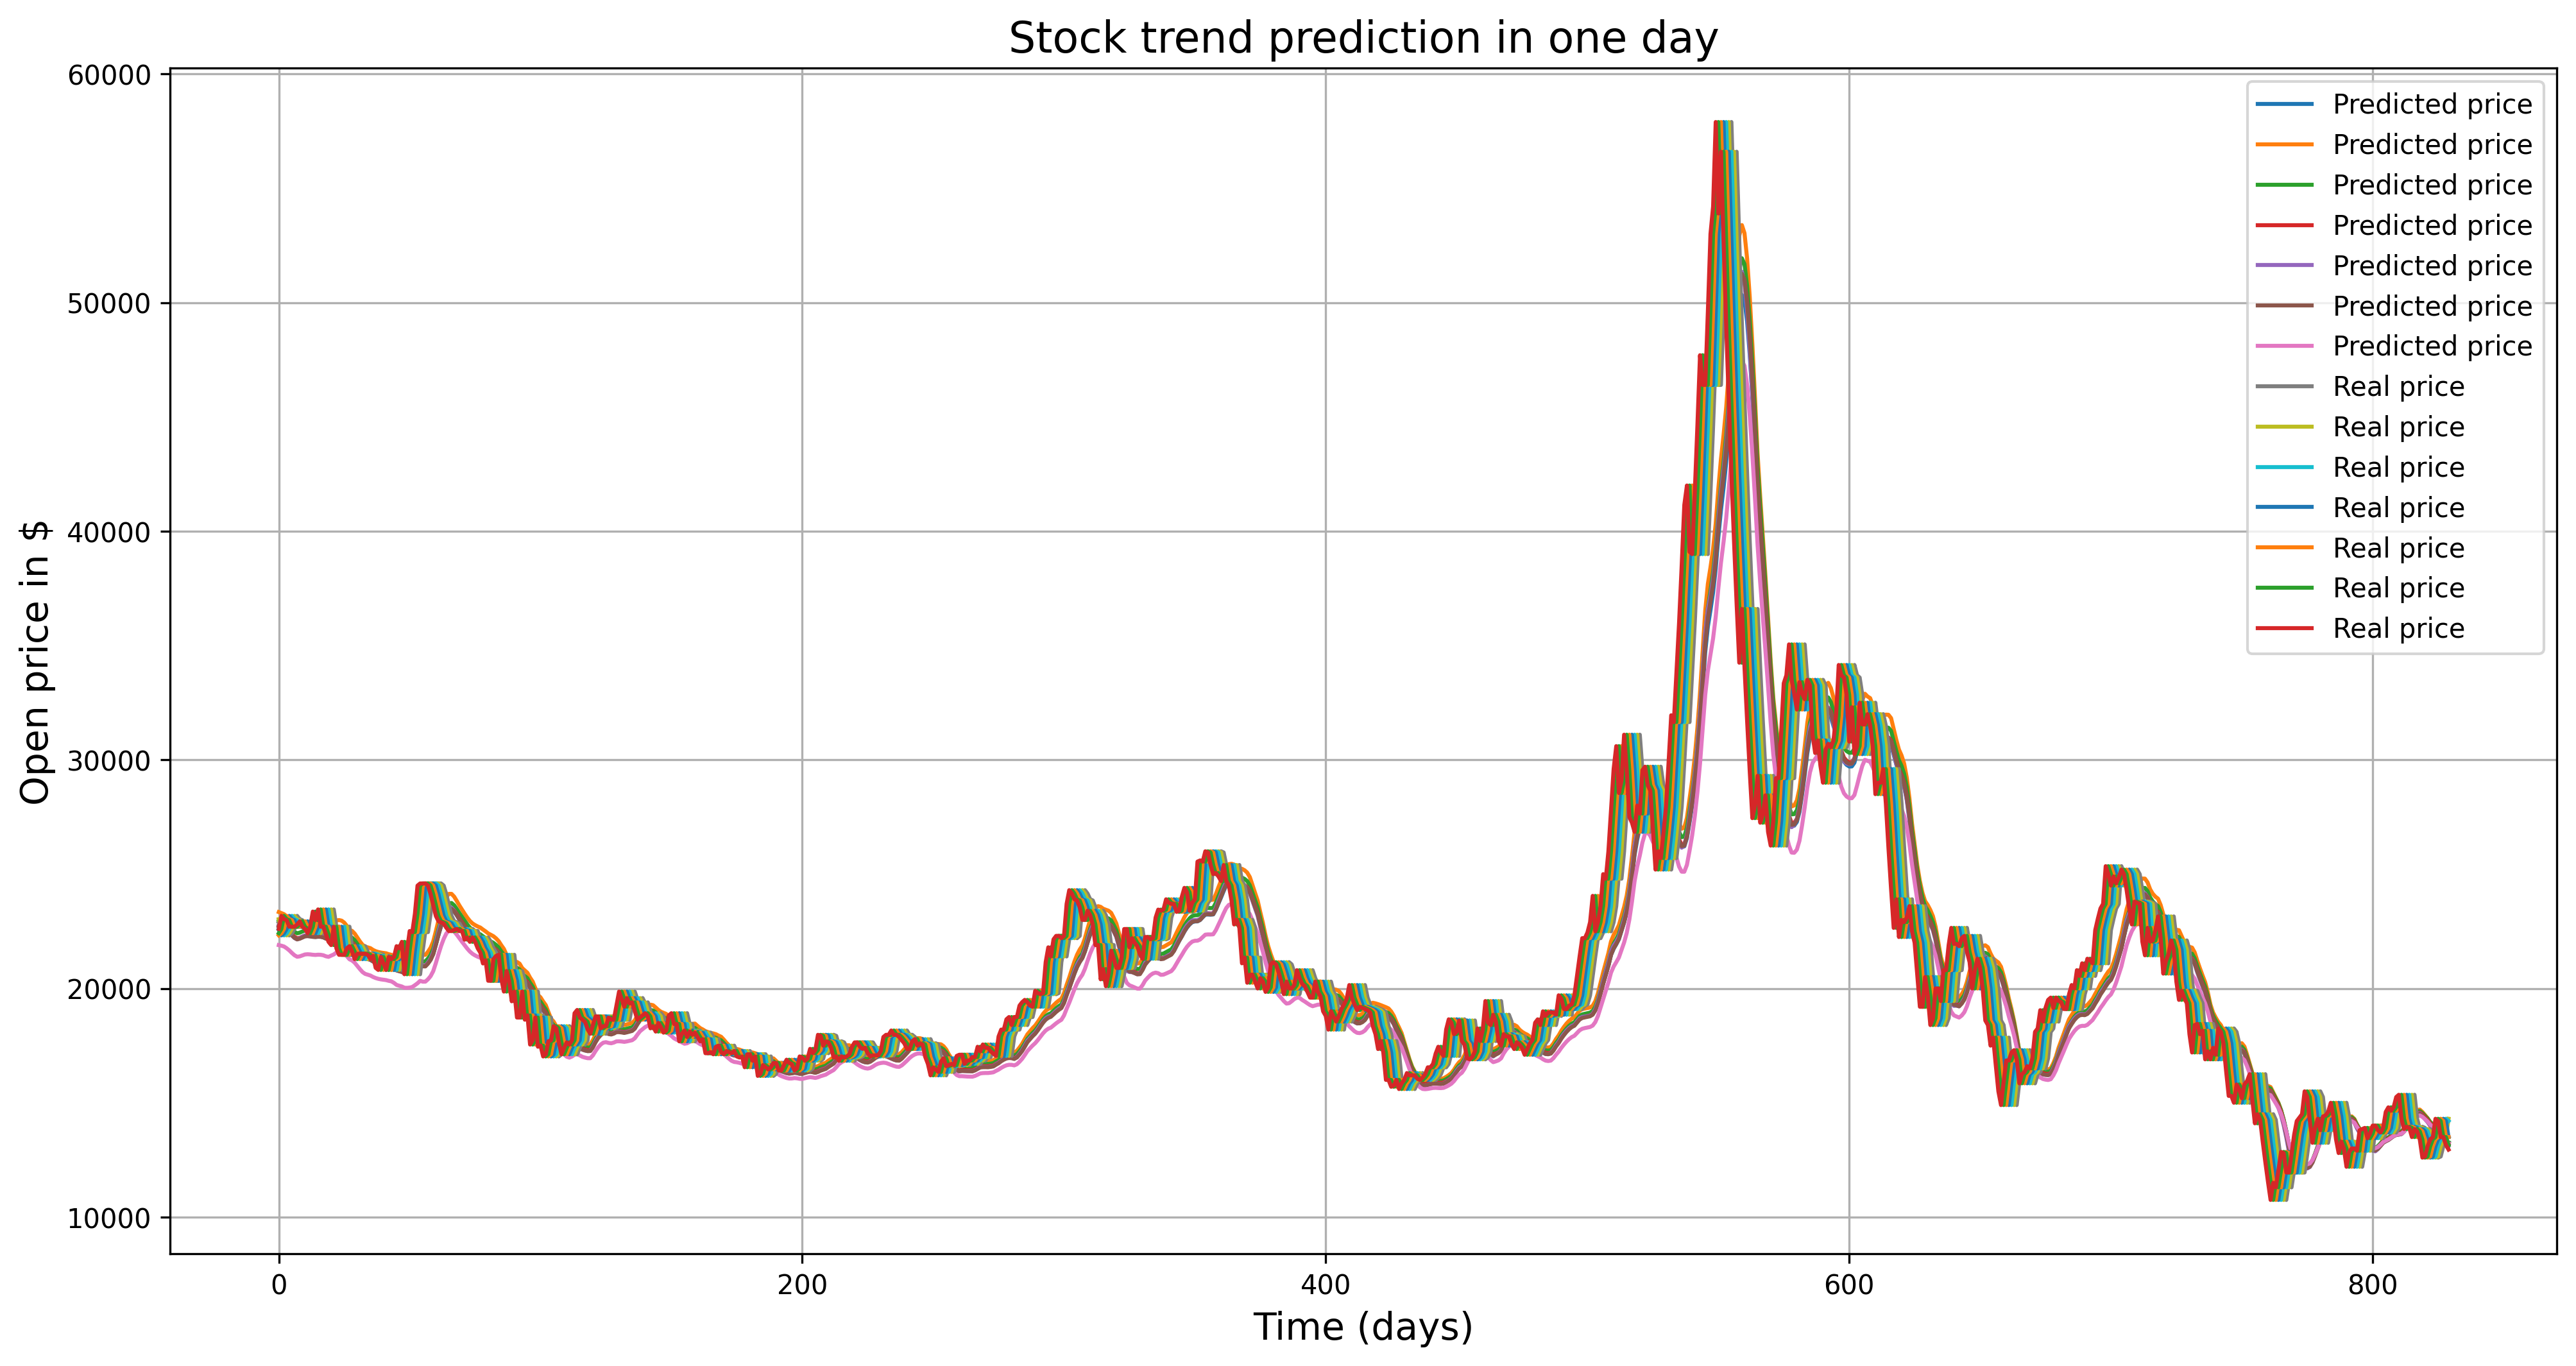

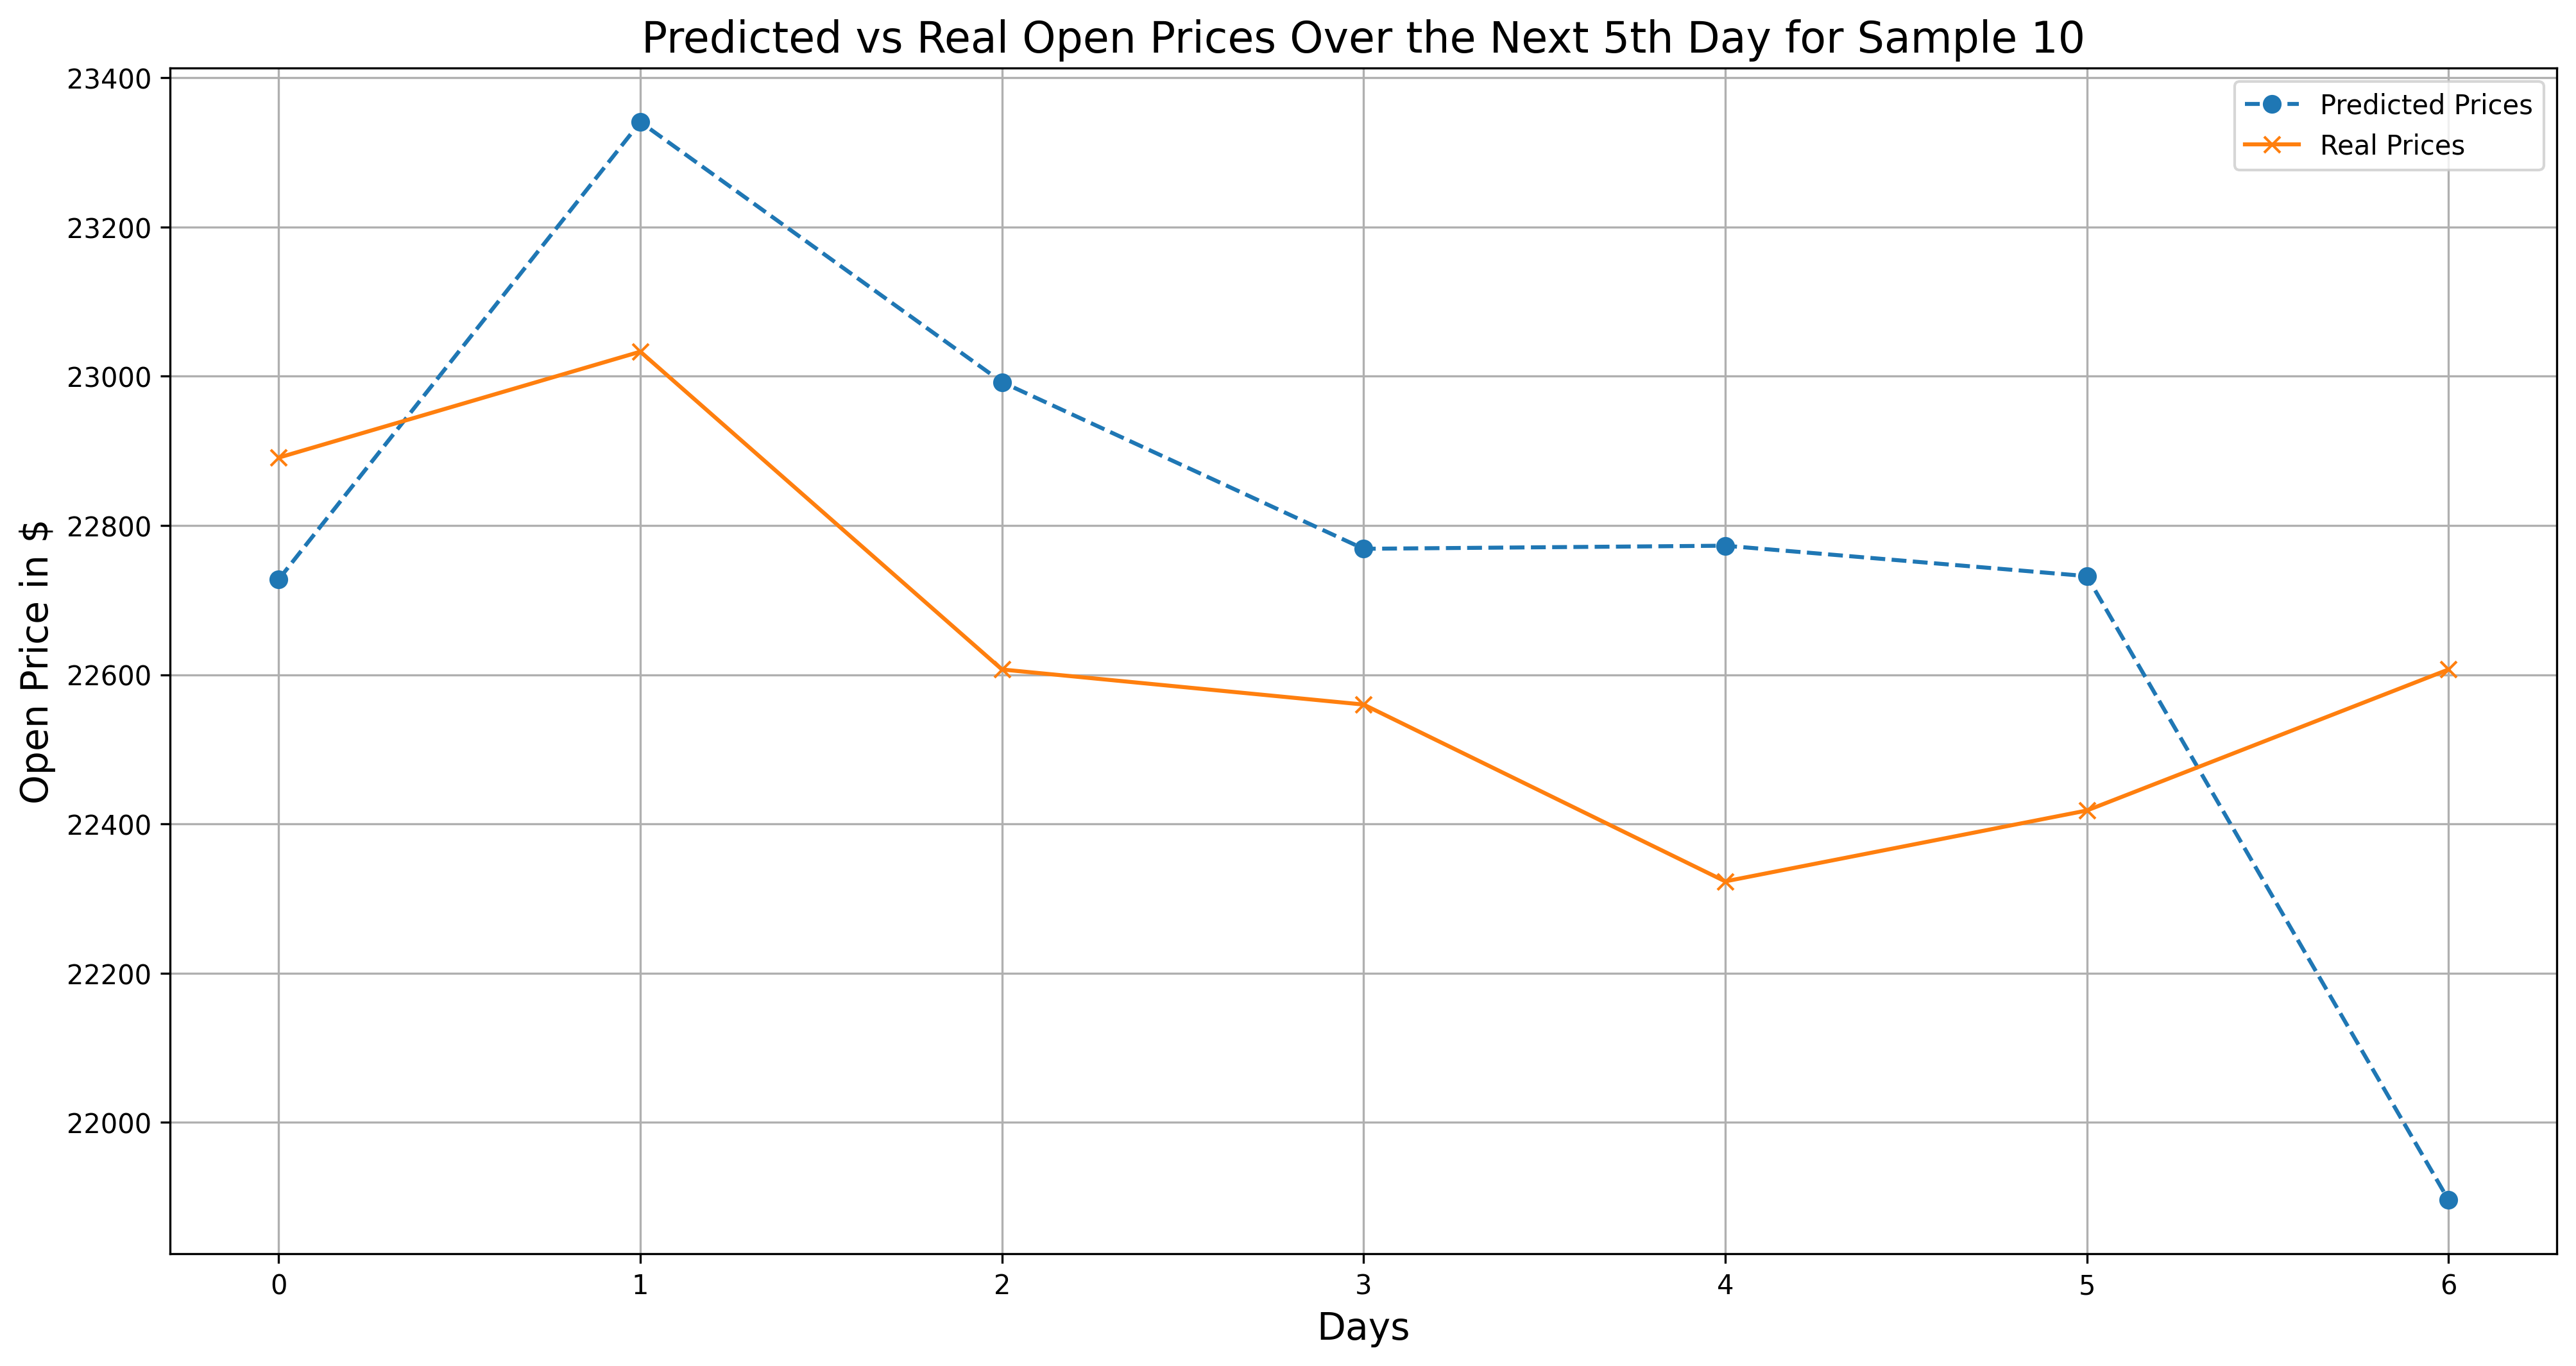

In [ ]:
plot_prediction(y_pred_denom_gru_ts, y_test, "GRU")
plot_prediction_timestep(y_pred_denom_gru_ts, y_test, "GRU")

In [ ]:
stop time series train here!

SyntaxError: invalid syntax (<ipython-input-23-6b03642708fb>, line 1)

# normal train

## normal split and normalise

In [ ]:
### Split the data into training, validation and test set

# Import the library
from sklearn.model_selection import train_test_split

# Split data into train, val and test. Note that 'shuffle=False' due to time-series data.
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=False)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, shuffle=False)

# Convert from lists to Numpy arrays for reshaping purpose
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

# Reshape the numpy array to fit the neural network input shape requirement
X_train = X_train.reshape(X_train.shape[0], window_size, 1)
X_val = X_val.reshape(X_val.shape[0], window_size, 1)
X_test = X_test.reshape(X_test.shape[0], window_size, 1)

# Print shape of the training, validation and test set
print("Shape of training set: ", X_train.shape)
print("Shape of validation set: ", X_val.shape)
print("Shape of test set: ", X_test.shape)

Shape of training set:  (2655, 30, 1)
Shape of validation set:  (664, 30, 1)
Shape of test set:  (830, 30, 1)


In [ ]:
print()
print("Shape of training set: ", y_train.shape)
print("Shape of validation set: ", y_val.shape)
print("Shape of test set: ", y_test.shape)


Shape of training set:  (2655, 7)
Shape of validation set:  (664, 7)
Shape of test set:  (830, 7)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

y_scaler = MinMaxScaler()
scaler = MinMaxScaler()

X_train_norm = X_train.copy()
X_val_norm = X_val.copy()
X_test_norm = X_test.copy()

for i in range(X_train.shape[2]):
  X_train_norm[:, :, i] = scaler.fit_transform(X_train[:, :, i])  # Normalize each feature across all timesteps
  X_val_norm[:, :, i] = scaler.transform(X_val[:, :, i])  # Apply the same scaling for validation data
  X_test_norm[:, :, i] = scaler.transform(X_test[:, :, i])  # Apply the same scaling for test data

  y_train_norm = y_scaler.fit_transform(y_train)
  y_val_norm = y_scaler.transform(y_val)
  y_test_norm = y_scaler.transform(y_test)


# Check the new shapes (they should remain the same as before)
print("Shape of scaled training set: ", X_train_norm.shape)
print("Shape of scaled validation set: ", X_val_norm.shape)
print("Shape of scaled test set: ", X_test_norm.shape)
print()
print("Shape of scales training label ", y_train_norm.shape)
print("Shape of scales validation label ", y_val_norm.shape)
print("Shape of scales test label ", y_test_norm.shape)

Shape of scaled training set:  (2655, 30, 1)
Shape of scaled validation set:  (664, 30, 1)
Shape of scaled test set:  (830, 30, 1)

Shape of scales training label  (2655, 7)
Shape of scales validation label  (664, 7)
Shape of scales test label  (830, 7)


In [ ]:
X_train_norm[0]

array([[0.23415362],
       [0.21331292],
       [0.19431689],
       [0.17590957],
       [0.15871895],
       [0.14211704],
       [0.12641783],
       [0.1113466 ],
       [0.09717807],
       [0.08387299],
       [0.0965501 ],
       [0.10981593],
       [0.12370972],
       [0.13458142],
       [0.11888222],
       [0.12975391],
       [0.13124534],
       [0.12551513],
       [0.12551513],
       [0.11978492],
       [0.11978492],
       [0.11797951],
       [0.11439584],
       [0.09972829],
       [0.09441733],
       [0.1054367 ],
       [0.09704832],
       [0.07891839],
       [0.07694301],
       [0.07694301]])

In [ ]:
y_train_norm[0]

array([0.07694301, 0.08565415, 0.0824158 , 0.0824158 , 0.08167098,
       0.08290155, 0.09060881])

In [ ]:
num_features = 1

## train

In [ ]:
# Compile and train LSTM
#Adam
#optimizer = Adam(learning_rate=0.001)
# Nadam
optimizer = Nadam(learning_rate=0.001)
model_lstm = create_lstm((window_size, num_features))
compile(model_lstm, optimizer)
callbacks = get_callbacks(file_path='model_lstm.keras')
history_lstm = train_history(model_lstm, 2048, 30,
                           callbacks,
                           X_train_norm, y_train_norm, validation_data = (X_val_norm, y_val_norm))

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - loss: 0.1321 - mae: 0.3249 - val_loss: 0.4231 - val_mae: 0.6301 - learning_rate: 0.0010
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 756ms/step - loss: 0.0935 - mae: 0.2689 - val_loss: 0.1996 - val_mae: 0.4195 - learning_rate: 0.0010
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 542ms/step - loss: 0.0408 - mae: 0.1646 - val_loss: 0.0291 - val_mae: 0.1357 - learning_rate: 0.0010
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 561ms/step - loss: 0.0131 - mae: 0.0878 - val_loss: 0.0064 - val_mae: 0.0652 - learning_rate: 0.0010
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 542ms/step - loss: 0.0059 - mae: 0.0616 - val_loss: 0.0042 - val_mae: 0.0520 - learning_rate: 0.0010
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 555ms/step - loss: 0.0046 - mae: 0.0543 - val_loss: 0.0048 - val_mae: 0.0530 - learning_rate: 0.0010
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 849ms/step - loss: 0.0041 - mae: 0.0509 - val_loss: 0.0046 - val_mae: 0.0517 - learning_rate: 0.0010
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━

In [ ]:
# Compile and train LSTM
#Adam
#optimizer = Adam(learning_rate=0.001)
# Nadam
optimizer = Nadam(learning_rate=0.001)
model_gru = create_gru((window_size, num_features))
compile(model_gru, optimizer)
callbacks = get_callbacks(file_path='model_gru.keras')
history_gru = train_history(model_gru, 2048, 30,
                           callbacks,
                           X_train_norm, y_train_norm, validation_data = (X_val_norm, y_val_norm))

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - loss: 0.1261 - mae: 0.3164 - val_loss: 0.4265 - val_mae: 0.6296 - learning_rate: 0.0010
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 464ms/step - loss: 0.0957 - mae: 0.2700 - val_loss: 0.3242 - val_mae: 0.5428 - learning_rate: 0.0010
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 537ms/step - loss: 0.0680 - mae: 0.2198 - val_loss: 0.2046 - val_mae: 0.4174 - learning_rate: 0.0010
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 452ms/step - loss: 0.0388 - mae: 0.1548 - val_loss: 0.0873 - val_mae: 0.2435 - learning_rate: 0.0010
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 511ms/step - loss: 0.0160 - mae: 0.0934 - val_loss: 0.0248 - val_mae: 0.1183 - learning_rate: 0.0010
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 702ms/step - loss: 0.0077 - mae: 0.0713 - val_loss: 0.0103 - val_mae: 0.0775 - learning_rate: 0.0010
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 936ms/step - loss: 0.0051 - mae: 0.0586 - val_loss: 0.0085 - val_mae: 0.0720 - learning_rate: 0.0010
Epoch 8/30
2/2 ━━━━━━━━

In [ ]:
# Compile and train BiLSTM
#Adam
#optimizer = Adam(learning_rate=0.001)
# Nadam
optimizer = Nadam(learning_rate=0.001)
model_bilstm = create_bilstm((window_size, num_features))
compile(model_bilstm, optimizer)
callbacks_bilstm = get_callbacks(file_path='model_bilstm.keras')
history_bilstm = train_history(model_bilstm, 2048, 30,
                               callbacks_bilstm,
                               X_train_norm, y_train_norm,
                               validation_data = (X_val_norm, y_val_norm))

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 955ms/step - loss: 0.3648 - mae: 0.4736 - val_loss: 0.5446 - val_mae: 0.7174 - learning_rate: 0.0010
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 414ms/step - loss: 0.1969 - mae: 0.3515 - val_loss: 0.5183 - val_mae: 0.6997 - learning_rate: 0.0010
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 684ms/step - loss: 0.1390 - mae: 0.2960 - val_loss: 0.5026 - val_mae: 0.6888 - learning_rate: 0.0010
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 594ms/step - loss: 0.1041 - mae: 0.2571 - val_loss: 0.4896 - val_mae: 0.6796 - learning_rate: 0.0010
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 402ms/step - loss: 0.0830 - mae: 0.2309 - val_loss: 0.4824 - val_mae: 0.6744 - learning_rate: 0.0010
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 400ms/step - loss: 0.0698 - mae: 0.2128 - val_loss: 0.4753 - val_mae: 0.6691 - learning_rate: 0.0010
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 456ms/step - loss: 0.0603 - mae: 0.2004 - val_loss: 0.4692 - val_mae: 0.6645 - learning_rate: 0.0010
Epoch 8/30
2/2 ━━━━━

In [ ]:
# Compile and train LSTM
#Adam
#optimizer = Adam(learning_rate=0.001)
# Nadam
optimizer = Nadam(learning_rate=0.001)
model_bigru = create_bigru((window_size, num_features))
compile(model_bigru, optimizer)
callbacks_bigru = get_callbacks(file_path='model_bigru.keras')
history_bigru = train_history(model_bigru, 2048, 30,
                              callbacks_bigru,
                              X_train_norm, y_train_norm,
                              validation_data = (X_val_norm, y_val_norm))

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - loss: 0.3424 - mae: 0.4450 - val_loss: 0.5458 - val_mae: 0.7172 - learning_rate: 0.0010
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 524ms/step - loss: 0.1810 - mae: 0.3361 - val_loss: 0.5106 - val_mae: 0.6940 - learning_rate: 0.0010
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 474ms/step - loss: 0.1226 - mae: 0.2818 - val_loss: 0.4818 - val_mae: 0.6744 - learning_rate: 0.0010
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 520ms/step - loss: 0.0897 - mae: 0.2413 - val_loss: 0.4733 - val_mae: 0.6685 - learning_rate: 0.0010
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 575ms/step - loss: 0.0732 - mae: 0.2196 - val_loss: 0.4656 - val_mae: 0.6629 - learning_rate: 0.0010
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - loss: 0.0624 - mae: 0.2047 - val_loss: 0.4612 - val_mae: 0.6596 - learning_rate: 0.0010
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step - loss: 0.0542 - mae: 0.1933 - val_loss: 0.4591 - val_mae: 0.6577 - learning_rate: 0.0010
Epoch 8/30
2/2 ━━━━━━━━━━

## performance

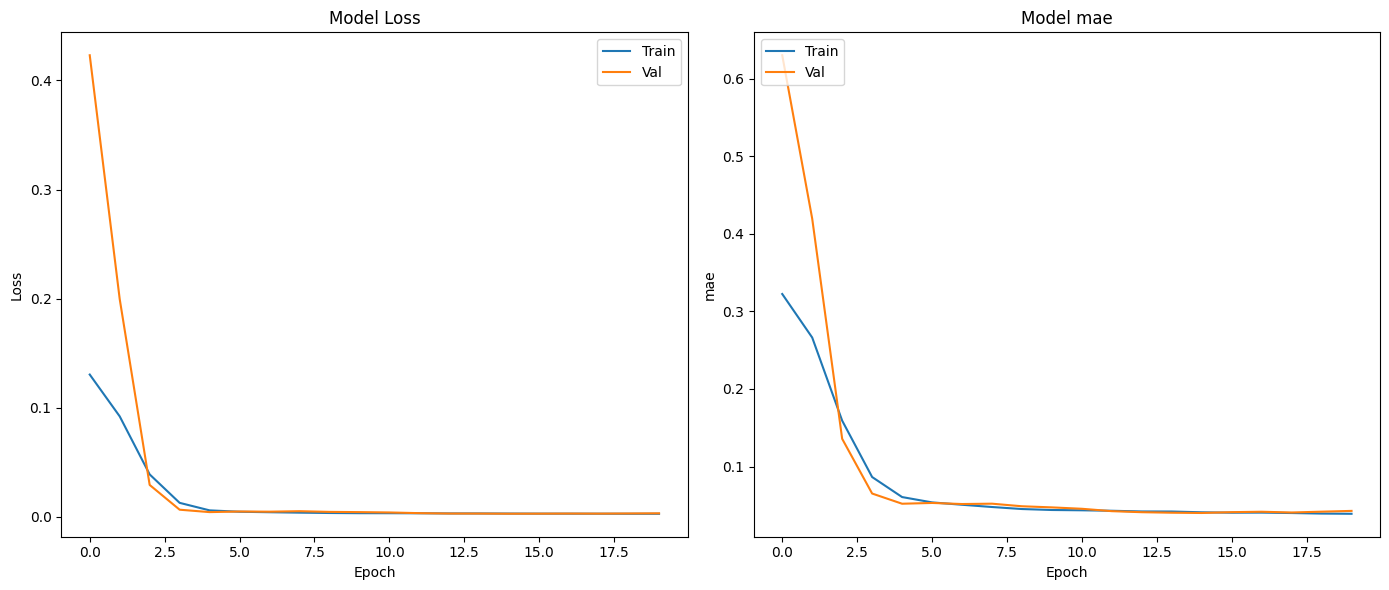

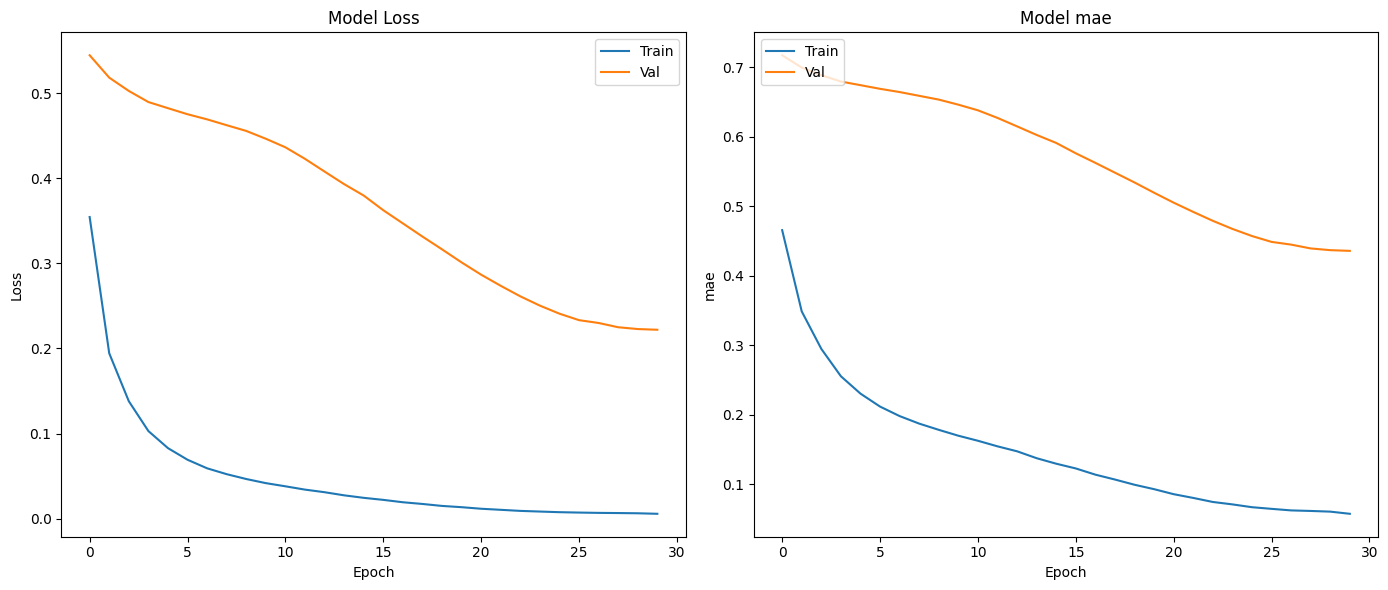

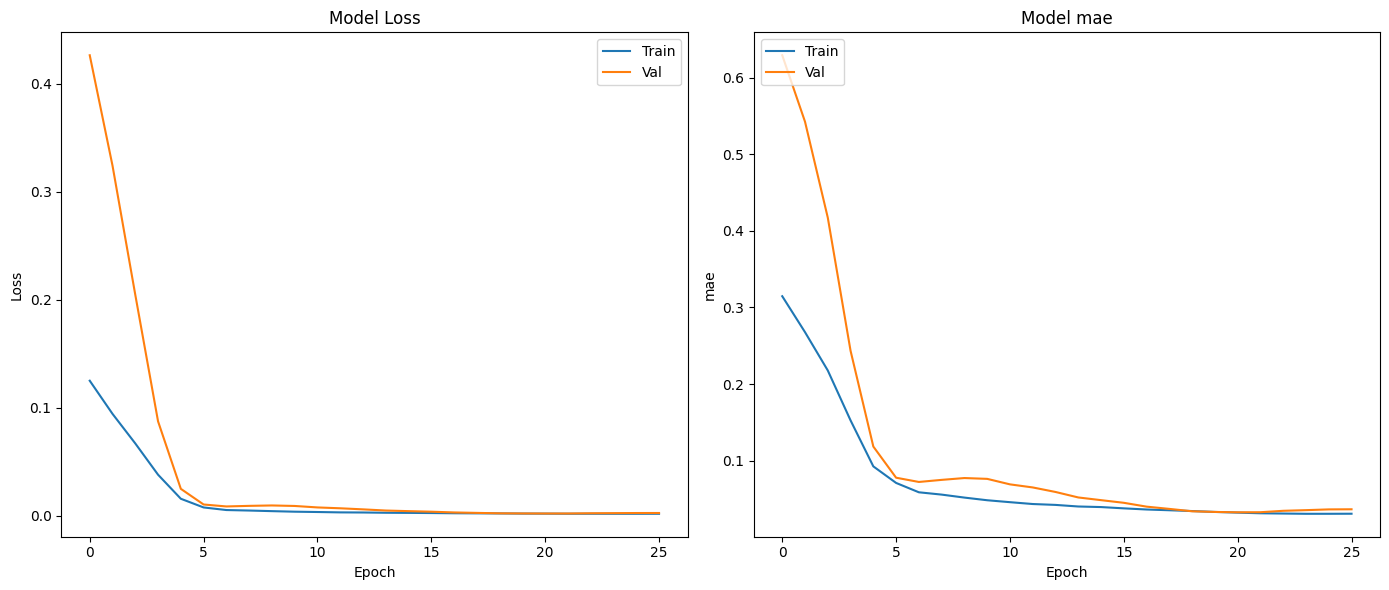

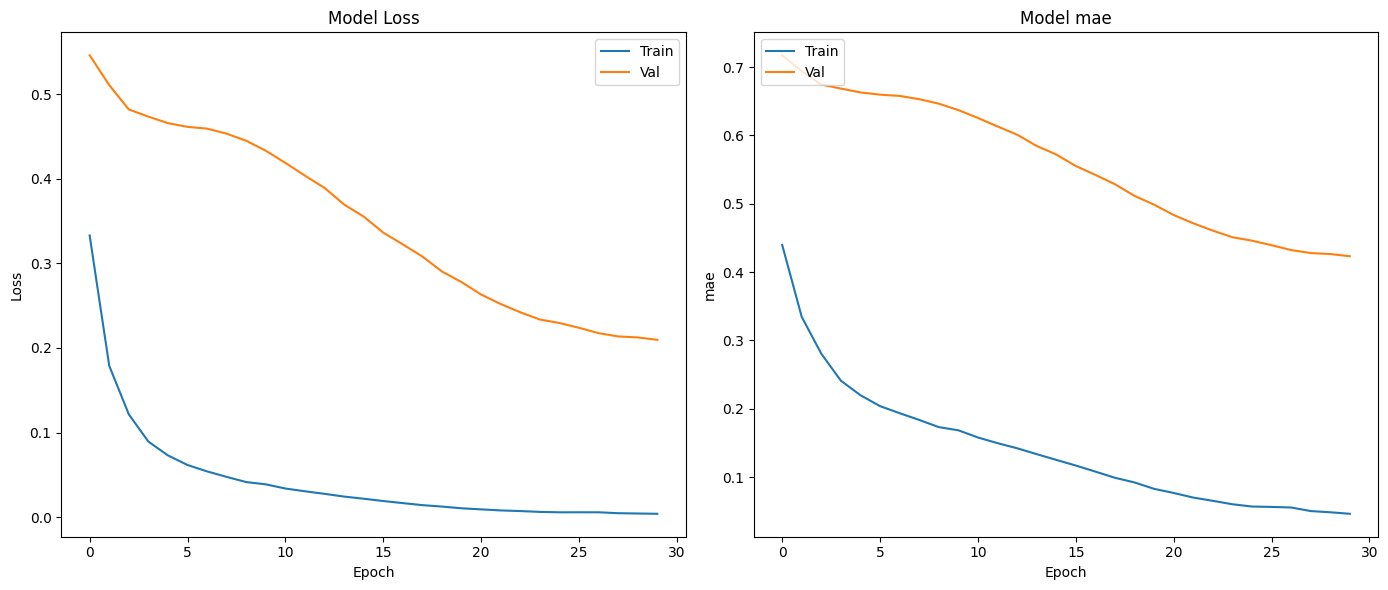

In [ ]:
plot_performance(history_lstm)
plot_performance(history_bilstm)
plot_performance(history_gru)
plot_performance(history_bigru)

## evaluate

In [ ]:
print("=========LSTM===========")
model_lstm = get_model_n_evaluate('/content/model_lstm.keras', X_test_norm, y_test_norm)
y_pred_denorm_lstm = get_reverse_prediction(model_lstm, X_test_norm, y_scaler)

print("=========GRU===========")
model_gru = get_model_n_evaluate('/content/model_gru.keras', X_test_norm, y_test_norm)
y_pred_denorm_gru = get_reverse_prediction(model_gru, X_test_norm, y_scaler)

print("=========BiLSTM===========")
model_bilstm = get_model_n_evaluate("/content/model_bilstm.keras", X_test_norm, y_test_norm)
y_pred_denorm_bilstm = get_reverse_prediction(model_bilstm, X_test_norm, y_scaler)
print()

print("=========BiGRU===========")
model_bigru = get_model_n_evaluate("/content/model_bigru.keras", X_test_norm, y_test_norm)
y_pred_denorm_bigru = get_reverse_prediction(model_bigru, X_test_norm, y_scaler)


=========LSTM===========
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0068 - mae: 0.0459
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.01384840626269579, mae = 0.06882334500551224
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
MSE on the test set:  0.013848405031264499
Shape of denormalized training set:  (830, 7)
=========GRU===========
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.0046 - mae: 0.0354
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.00944489985704422, mae = 0.054037488996982574
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
MSE on the test set:  0.009444899599953888
Shape of denormalized training set:  (830, 7)
=========BiLSTM===========
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0653 - mae: 0.2136
['loss', 'compile_metrics']
Loss and mae on the test set: loss = 0.08930772542953491, mae = 0.2250518947839737
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step
MSE on the test set:  0.08930773168539609
Shape of denormalized training set:  (830

In [ ]:
#plot_prediction(y_pred_denorm_1d, y_test, "Convo1D")
plot_prediction(y_pred_denorm_bigru, y_test, "BiGRU")
plot_prediction(y_pred_denorm_bilstm, y_test, "BiLSTM")
plot_prediction(y_pred_denorm_lstm, y_test, "LSTM")
plot_prediction(y_pred_denorm_gru, y_test, "GRU")

In [ ]:
stop here!

# FUNCTIONS

In [ ]:
def get_prediction(loaded_model, X_test_norm):
    # Get prediction on the test data
    y_pred_norm = loaded_model.predict(X_test_norm)
    return y_pred_norm

In [ ]:
# Visualize preditec stock price versus real stock price
def plot_prediction(y_pred_denorm, y_test, title):
  plt.figure(figsize=(16, 8), dpi=300)
  plt.plot(y_pred_denorm, label='Predicted price')
  plt.plot(y_test, label='Real price')
  plt.title('Stock trend prediction in one day', fontsize=16)
  plt.xlabel('Time (days)', fontsize=14)
  plt.ylabel('Close price in $', fontsize=14)
  plt.grid() # Add grid
  plt.legend() # Add legend
  plt.show()

In [ ]:
def plot_prediction_timestep(y_pred_denorm, y_test, title, time_steps=np.arange(0, 1)):
  plt.figure(figsize=(16, 8), dpi=300)
  # Plot for the first sample only
  plt.plot(time_steps, y_pred_denorm[500], label='Predicted Prices', linestyle='--', marker='o')
  plt.plot(time_steps, y_test[500], label='Real Prices', linestyle='-', marker='x')

  # Add titles, labels, and legend
  plt.title('Predicted vs Real Close Prices Over the Next 1 Day for Sample 500', fontsize=16)
  plt.xlabel('Days', fontsize=14)
  plt.ylabel('Close Price in $', fontsize=14)
  plt.xticks(time_steps)  # Set x-ticks to represent days
  plt.grid()  # Add grid
  plt.legend()  # Add legend
  plt.show()


# Predict buying/selling signal of the next day

In [ ]:
def get_dataFrame(ticker):
    data_file_path = os.path.join(data_folder_path,
                                  selected_ticker + "-History.csv")
    data = pd.read_csv(data_file_path)
    data.drop(columns="Unnamed: 0", inplace=True)
    # data.drop(columns='TradingDate', inplace=True)
    data.dropna()
    return data


def get_30_latest_data(data):
    latest_data_feature = np.array(data['Close'].tail(30)).reshape(1, 30)
    return latest_data_feature

def normalise(latest_data_feature, feature_scalers_path):
  feature_scalers = joblib.load(feature_scalers_path)
  latest_data_feature_norm = feature_scalers[0].transform(latest_data_feature)
  return latest_data_feature_norm


def predict_7days(model_path, latest_data_feature_norm):
    model = tf.keras.models.load_model(model_path)
    y_pred = get_prediction(model, latest_data_feature_norm)
    return y_pred
#Buy: Price change over 7 days is ≤ -5%.
#Sell: Price change over 7 days is ≥ +5%.

def get_signal(y_pred):
    # Calculate the change in price (percentage change)
    changes = ((y_pred[0][-1] - y_pred[0][0]) / y_pred[0][0]) * 100
    if changes >= 5:
        return "Sell", changes
    elif changes < -5:
        return "Buy", changes
    return "Hold", changes


def predict_signal(ticker, model_path, feature_scalers_path, y_scaler_path):
    data = get_dataFrame(ticker)
    # Get the latest data for the selected ticker
    latest_data_feature = get_30_latest_data(data)
    # Normalize the data using the feature scaler
    data_norm = normalise(latest_data_feature, feature_scalers_path)
    # Get the prediction from the model
    y_pred = predict_7days(model_path, data_norm)
    # Denormalize the prediction (post-prediction logic)
    y_scaler = joblib.load(y_scaler_path)
    y_pred_denorm = y_scaler.inverse_transform(y_pred)
    # Get the buying/selling signal
    signal_n_changes = get_signal(y_pred_denorm)
    return signal_n_changes

In [ ]:
predict_signal("AAT-VNINDEX-History.csv", "/content/3.1_7days_close_model_gru_ts.keras", "feature_scalers.pkl", "y_scaler.pkl")

Input data type: <class 'numpy.ndarray'>, shape: (1, 30)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
Prediction type: <class 'numpy.ndarray'>, shape: (1, 7)
Denormalized prediction type: <class 'numpy.ndarray'>, shape: (1, 7)
Shape of denormalized training set:  (1, 7)


'Sell'

# predict buying and sellign signal within 7 days

In [ ]:
def get_buying_date_n_price(y_pred_denorm, df):
    best_day_index = y_pred_denorm.argmax(axis=1)  # Get the index of the highest return for each sequence
    look_ahead = 7
    last_date = df.index[-1]
    future_dates = pd.date_range(start=last_date,
                                 periods=look_ahead + 1,
                                 freq='D')[1:]  # Include weekends
    # Flatten y_pred_denorm to align with the date mapping
    # Use this with cautious!!
    y_pred_denorm_flat = y_pred_denorm.flatten()
    future_prices = pd.Series(y_pred_denorm_flat, index=future_dates)
    best_buy_dates = future_dates[best_day_index]
    price_on_best_day = future_prices[best_buy_dates]
    return best_buy_dates, price_on_best_day

In [ ]:
def get_buying_date(y_pred_denorm, df):
  best_day_index = y_pred_denorm.argmax(axis=1)  # Get the index of the highest return for each sequence
  look_ahead = 7
  last_date = data_vn.index[-1]
  future_dates = pd.date_range(start=last_date, periods=look_ahead + 1, freq='D')[1:]  # Include weekends
  best_buy_dates = future_dates[best_day_index]
  return best_buy_dates

def predict_buying_date(ticker, model_path, feature_scalers_path, y_scaler_path):
    data = get_dataFrame(ticker)
    # Get the latest data for the selected ticker
    latest_data_feature = get_30_latest_data(data)

    # Normalize the data using the feature scaler
    data_norm = normalise(latest_data_feature, feature_scalers_path)

    # Get the prediction from the model
    y_pred = predict_7days(model_path, data_norm)

    # Denormalize the prediction (post-prediction logic)
    y_scaler = joblib.load(y_scaler_path)
    y_pred_denorm = y_scaler.inverse_transform(y_pred)

    # Get the buying/selling signal
    buy_date = get_buying_date(y_pred_denorm, data)
    return buy_date

In [ ]:
get_buying_date(y_pred_denorm_gru, data_vn)

DatetimeIndex(['2023-03-02', '2023-03-02', '2023-03-02', '2023-03-02',
               '2023-03-02', '2023-03-02', '2023-03-02', '2023-03-02',
               '2023-03-02', '2023-03-02',
               ...
               '2023-03-05', '2023-03-05', '2023-03-05', '2023-03-07',
               '2023-03-07', '2023-03-07', '2023-03-07', '2023-03-07',
               '2023-03-07', '2023-03-07'],
              dtype='datetime64[ns]', length=830, freq=None)

In [ ]:
# 7. **Determine the Best Day to Buy**
# Find the index of the day with the highest predicted return
best_day_index = y_pred_denorm_gru.argmax(axis=1)  # Get the index of the highest return for each sequence
best_day_index.shape

(830,)

In [ ]:
look_ahead = 7
# Get the latest date in the original dataframe
last_date = data_vn.index[-1]
print(last_date)
# Generate the future dates (e.g., 7 days ahead of the last date)
future_dates = pd.date_range(start=last_date, periods=look_ahead + 1, freq='D')[1:]  # Skip the last date and generate business days
print(future_dates)
# Map the predicted indices to the future dates
best_buy_dates = future_dates[best_day_index]
# Print the best buy dates
print(f"Best days to buy (with highest predicted return) are: {best_buy_dates}")

2023-02-28 00:00:00
DatetimeIndex(['2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04',
               '2023-03-05', '2023-03-06', '2023-03-07'],
              dtype='datetime64[ns]', freq='D')
Best days to buy (with highest predicted return) are: DatetimeIndex(['2023-03-02', '2023-03-02', '2023-03-02', '2023-03-02',
               '2023-03-02', '2023-03-02', '2023-03-02', '2023-03-02',
               '2023-03-02', '2023-03-02',
               ...
               '2023-03-05', '2023-03-05', '2023-03-05', '2023-03-07',
               '2023-03-07', '2023-03-07', '2023-03-07', '2023-03-07',
               '2023-03-07', '2023-03-07'],
              dtype='datetime64[ns]', length=830, freq=None)


In [ ]:
data_vn["TradingDate"] = pd.to_datetime(data_vn["TradingDate"])
data_vn.set_index("TradingDate", inplace=True)
data_vn.head()

,Unnamed: 0,Open,High,Low,Close,Volume
TradingDate,,,,,,
2006-05-18,0,10850.0,10563.0,10563.0,10563.0,275600
2006-05-19,1,10308.0,10032.0,10032.0,10032.0,443520
2006-05-22,2,9809.0,9548.0,9548.0,9548.0,64200
2006-05-23,3,9331.0,9079.0,9079.0,9079.0,12760
2006-05-24,4,8876.0,8641.0,8641.0,8641.0,46460


In [ ]:
data_vn.iloc[0,-2]

10563.0

# test predict

In [ ]:
new_data = pd.read_csv("AAT-VNINDEX-History.csv")
new_data.head()

In [ ]:
new_data.drop(columns="Unnamed: 0", inplace = True)
new_data.drop(columns='TradingDate', inplace = True)
new_data.head()

In [ ]:
print(feature_scalers)
y_scaler

In [ ]:
latest_data_feature = [np.array(new_data['Close'].tail(30))]
latest_data_feature_norm = feature_scalers[0].transform(latest_data_feature)
latest_data_feature_norm

In [ ]:
model_path1 = "/content/3.1_7days_close_model_gru_ts.keras"
model_path2= "/content/3_7days_close_model_gru_ts.keras"
model_gru1 = tf.keras.models.load_model(model_path2)
model_gru2 = tf.keras.models.load_model(model_path1)
y_pred_gru1 = get_prediction(model_gru1, latest_data_feature_norm, y_scaler)
y_pred_gru2 = get_prediction(model_gru2, latest_data_feature_norm, y_scaler)

In [ ]:
print(y_pred_gru1[0])
print(y_pred_gru2[0])

In [ ]:
((y_pred_gru1[0][-1] - y_pred_gru1[0][0])/ y_pred_gru1[0][0]) *100

In [ ]:
plot_prediction_timestep(y_pred_gru1, y_test, "GRU")
plot_prediction_timestep(y_pred_gru2, y_test, "GRU")

In [ ]:
loaded_model = tf.keras.models.load_model("/content/model_gru.keras")
# Perform the prediction using the model
y_pred_norm = loaded_model.predict(X_test_norm)
print(f"Prediction type: {type(y_pred_norm)}, shape: {y_pred_norm.shape}")

# Denormalize the prediction to the original scale
#y_pred_denorm = y_scaler.inverse_transform(y_pred_norm)
y_pred_denorm = y_scaler.inverse_transform(y_pred_norm)

In [ ]:
y_pred_denorm_gru[0].flatten()

array([22596.188, 23245.055, 23079.715, 22894.48 , 22977.428, 22971.318,
       22667.734], dtype=float32)

In [ ]:
y_pred_denorm_gru.shape

(830, 7)